In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [69]:
np.random.seed(0)

In [70]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state = 123, noise=0.1, factor=0.2)

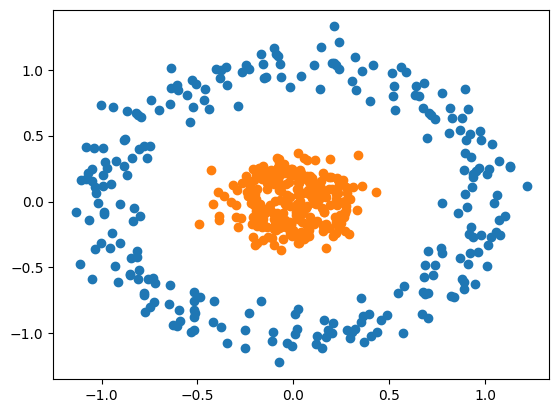

In [71]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [72]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='sigmoid'))  #first hidden layer
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

In [73]:
h = model.fit(x=X, y=y, verbose = 1, batch_size = 20, epochs=500, shuffle='true')

Epoch 1/500
25/25 [==============================] - 1s 2ms/step - loss: 0.8195 - accuracy: 0.5000
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8023 - accuracy: 0.5000
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7867 - accuracy: 0.5000
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7738 - accuracy: 0.5000
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7615 - accuracy: 0.5000
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.5000
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7427 - accuracy: 0.5000
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5000
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7283 - accuracy: 0.5000
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.5000
Epoch 11/

Text(0.5, 0, 'epoch')

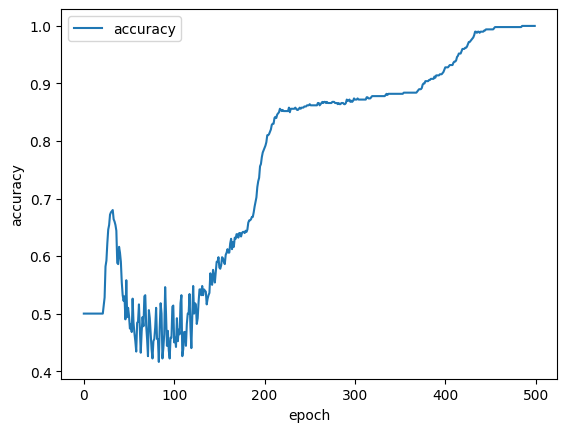

In [74]:
plt.plot(h.history['accuracy'])
plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

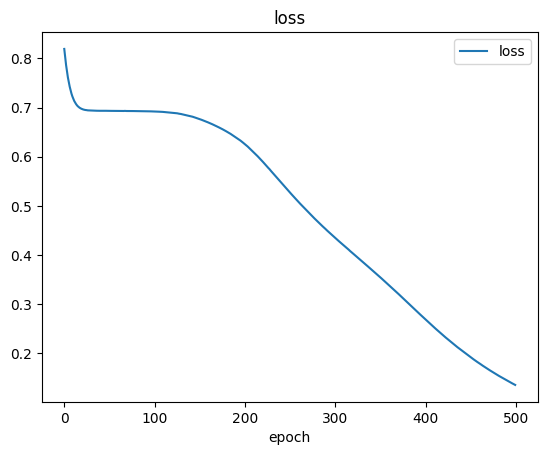

In [75]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [76]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z= pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)


1/1 [==============================] - 0s 20ms/step
Prediction is:  [[0.93711996]]


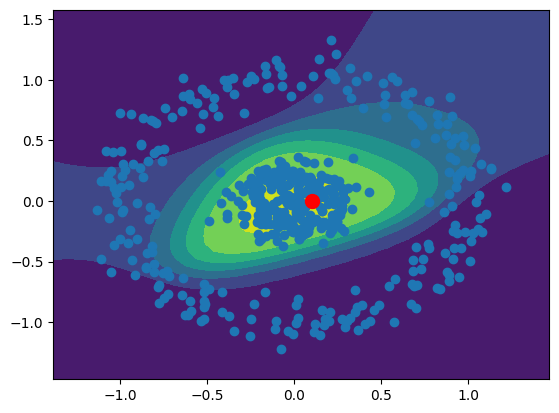

In [77]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 0.1
y = 0
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", prediction)